In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

## Regression

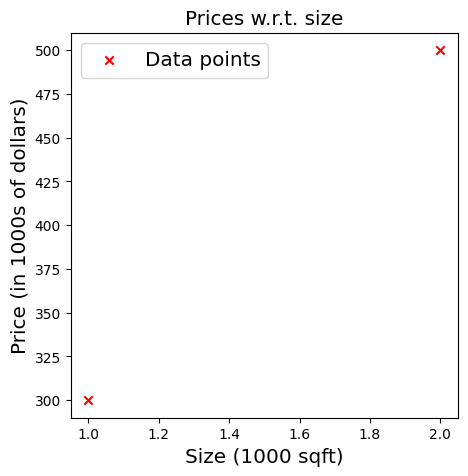

In [13]:
X_train = np.array([[1.0],[2.0]], dtype=np.float32)
y_train = np.array([[300.0],[500.0]], dtype=np.float32)

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(X_train, y_train, marker='x', color='red', label='Data points')
ax.legend(fontsize='x-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='x-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='x-large')
ax.set_title('Prices w.r.t. size', fontsize='x-large')
plt.show()

In [14]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')

In [15]:
linear_layer.get_weights()

[]

In [27]:
a1 = linear_layer(X_train[0].reshape(1, 1))
a1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-1.3942783]], dtype=float32)>

In [28]:
w, b = linear_layer.get_weights()
print(f"w = {w}, b = {b}")

w = [[-1.3942783]], b = [0.]


In [30]:
set_w = np.array([[200]])
set_b = np.array([100])
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [32]:
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)
alin = np.dot(X_train[0].reshape(1, 1), set_w) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [33]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b

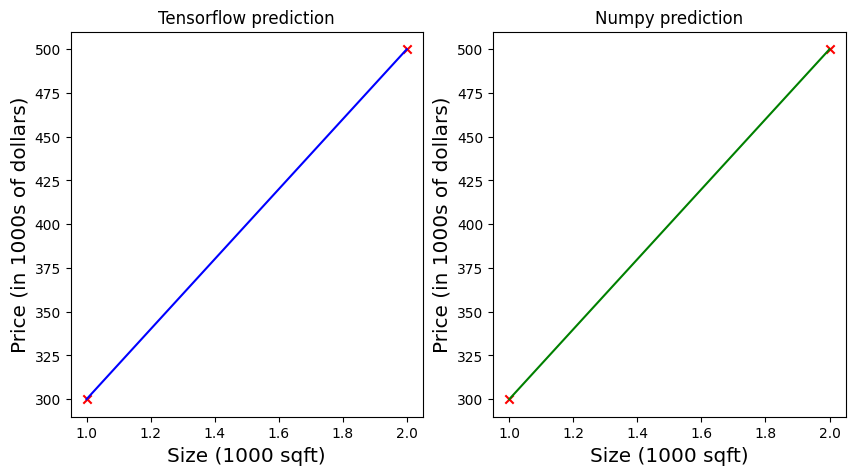

In [45]:
plt2, ax2 = plt.subplots(1, 2, figsize = (10, 5))
ax2[0].scatter(X_train, y_train, marker = 'x', color = 'red')
ax2[0].plot(X_train, prediction_tf, color = 'blue')
ax2[0].set_title('Tensorflow prediction')
ax2[0].set_ylabel('Price (in 1000s of dollars)', fontsize='x-large')
ax2[0].set_xlabel('Size (1000 sqft)', fontsize='x-large')

ax2[1].scatter(X_train, y_train, marker = 'x', color = 'red')
ax2[1].plot(X_train, prediction_np, color = 'green')
ax2[1].set_title('Numpy prediction')
ax2[1].set_ylabel('Price (in 1000s of dollars)', fontsize='x-large')
ax2[1].set_xlabel('Size (1000 sqft)', fontsize='x-large')

plt.show()

## Classification

In [46]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1, 1)
y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.float32).reshape(-1, 1)

In [48]:
pos = y_train == 1
neg = y_train == 0

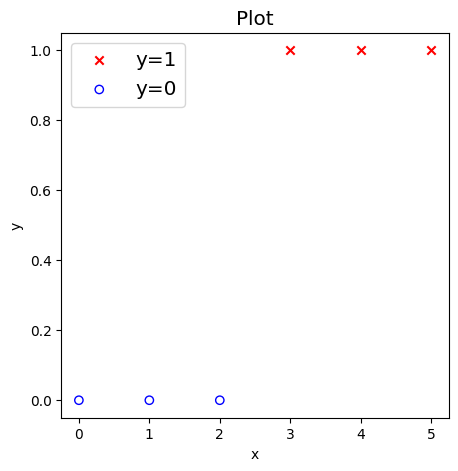

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X_train[pos], y_train[pos], marker = 'x', color = 'red', label='y=1')
ax.scatter(X_train[neg], y_train[neg], marker = 'o', color = 'blue', facecolor = 'none', label='y=0')
ax.legend(fontsize='x-large')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Plot', fontsize='x-large')
plt.show()

In [57]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name='L1')
    ]
)

/Users/tanishqsharma/Desktop/Dev-Practice/machine-learning/self-exploration/se_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(f"w = {w}, b = {b}")
print(w.shape, b.shape)

w = [[-0.479187]], b = [0.]
(1, 1) (1,)


In [61]:
set_w = np.array([[2]])
set_b = np.array([-4.5])

logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [ ]:
def sigmoid(z):
    
    g = 1 / (1 + np.exp(-z))
    return g

In [62]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoid(np.dot(X_train[0].reshape(1, 1), set_w) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.01098694]]
tf.Tensor([[0.01098694]], shape=(1, 1), dtype=float64)


## Tried to learn tensorflow implementation of linear and logistic functions for predictions